Drive bağlantısı

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Klasöre girme

In [8]:
import os

klasor_yolu = '/content/gdrive/MyDrive/TITANIC'
os.chdir(klasor_yolu)

print("Geçerli dizin:", os.getcwd())

Geçerli dizin: /content/gdrive/MyDrive/TITANIC


Gerekli kütüphanaler ve titanic setini indirme

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

titanic = sns.load_dataset('titanic')

Titanic hakkında bilgi verme

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Kadın cinsinden bir ve üçüncü sınıflardan, 30 yaş üstü ve hayatta olmayan kişileri tablo olarak gösterme

In [12]:
titanic[
    (titanic.sex =='female')
    & (titanic['class'].isin(['First', 'Third']))
    & (titanic.age >30)
    & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True


Toens_dic adından bie sözlük oluşturulur ve bir pandas dataframe oluşturulur. Sözlüğe belirli anahtarlar verilir. Ve en sonunda tablo olarak bastırılır.

In [17]:
towns_dic = {
    'name': ['Southampton','Cherbourg','Queenstown','Montevideo'],
    'country': ['United Kingdom', 'France', 'United Kingdom', "Uruguay"],
    'population': [236900, 37121, 12347, 1305000],
    'age':  [np.random.randint(500, 1000) for _ in range(4)]
}
towns_df = pd.DataFrame(towns_dic)

In [19]:
(titanic.merge(
    towns_df,
    left_on = 'embark_town', right_on = 'name',
    how='left',
    indicator = True,
    suffixes =('passenger', '_city')
)).head()

,survived,pclass,sex,agepassenger,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,name,country,population,age_city,_merge
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Southampton,United Kingdom,236900.0,756.0,both
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Cherbourg,France,37121.0,952.0,both
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Southampton,United Kingdom,236900.0,756.0,both
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Southampton,United Kingdom,236900.0,756.0,both
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Southampton,United Kingdom,236900.0,756.0,both


Yaş grafiği grafikte verilir.

<ipython-input-30-68514ad566f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.age.dropna())


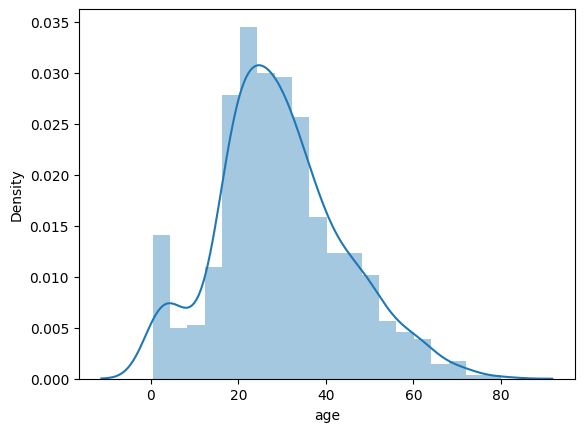

In [30]:
import seaborn
import matplotlib.pyplot as plt
sns.distplot(titanic.age.dropna())
plt.show()

Survived ve class verilerini sutün bileşenlerine atıyorum. Ardından yaş ile kıyaslama yapıyoruz.

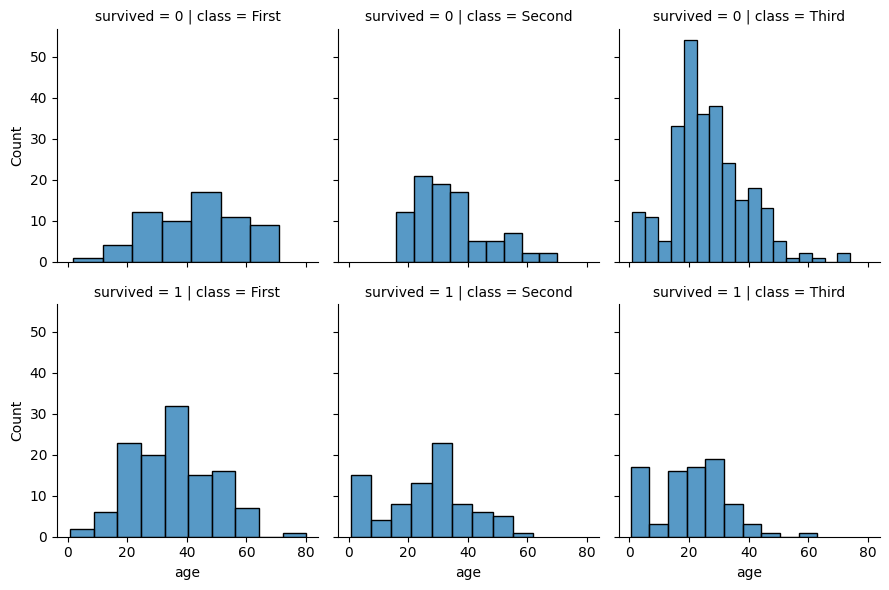

In [44]:
g = sns.FacetGrid(titanic, row = 'survived', col = 'class')
g.map(sns.histplot, "age")
plt.show()

Veridde age'i x eksenine, fare'i y eksenine veriyoruz. Çizim türü olarak regresyon çizimi kullanılır. Grafik rengi yeşil olarak belirlenir.

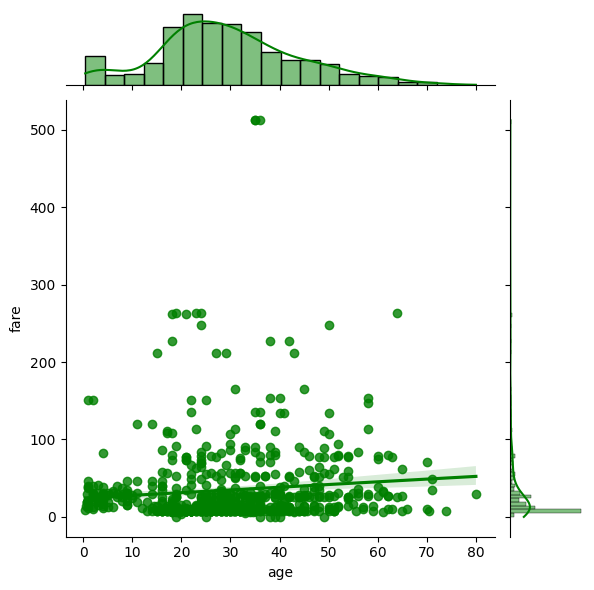

In [48]:
sns.jointplot(data=titanic, x ='age', y='fare', kind = 'reg', color = 'g')
plt.show()

Pivot tablosu oluşturulur.

<Axes: xlabel='age', ylabel='embark_town'>

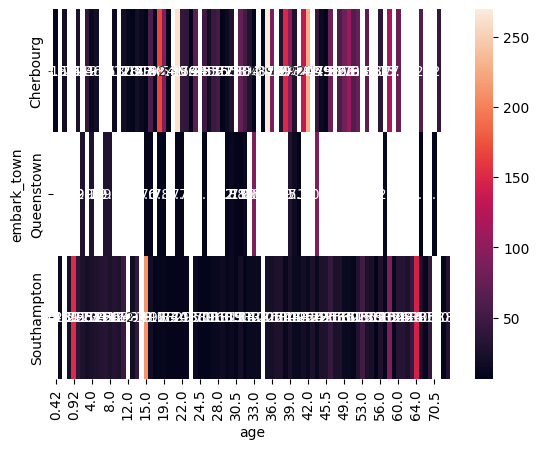

In [54]:
df = titanic.pivot_table(index='embark_town', columns='age', values = 'fare', aggfunc = np.median)
sns.heatmap(df, annot=True, fmt =".1f")

Veri içindeki veri başlıklarını sıralıyorum.

In [52]:
import seaborn as sns

# Veriyi yükle
titanic = sns.load_dataset("titanic")

# Sütun adlarını yazdır
print(titanic.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
